<a href="https://colab.research.google.com/github/ldawes8/Unit-3-Capstone-/blob/master/Thinkful_Capstone_Unit_3_Breast_Cancer_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESEARCH QUESTION

Using set of breast cancer data, create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed?

In [0]:
#Import Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
from sklearn import linear_model
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import os
%matplotlib inline 
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

DATA PRE-PREPROCESSING

The first step is to load the data and gain a better understanding of the information each column contains.


In [4]:
#Import Data for Challenge 
from google.colab import files
uploaded = files.upload()

Saving breast_cancer.data to breast_cancer.data


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['breast_cancer.data']), header=0)
#These column names were present in a txt file that accompanied the dataset (For more info please see txt file)
colnames ='id_number', 'diagnosis', 'M_radius','M_texture', 'M_perimeter', 'M_area', 'M_smoothness', 'M_compactness', 'M_concavity', 'M_concave points', 'M_symmetry','M_fractal dimension', 'SE_radius','SE_texture', 'SE_perimeter', 'SE_area', 'SE_smoothness', 'SE_compactness', 'SE_concavity', 'SE_concave points', 'SE_symmetry','SE_fractal dimension', 'Worst_radius','Worst_texture', 'Worst_perimeter', 'Worst_area', 'Worst_smoothness', 'Worst_compactness', 'Worst_concavity', 'Worst_concave points', 'Worst_symmetry','Worst_fractal dimension'
df.columns=colnames

In [6]:
# Take an initial look at the data provided 
df.head(20)

,id_number,diagnosis,M_radius,M_texture,M_perimeter,M_area,M_smoothness,M_compactness,M_concavity,M_concave points,M_symmetry,M_fractal dimension,SE_radius,SE_texture,SE_perimeter,SE_area,SE_smoothness,SE_compactness,SE_concavity,SE_concave points,SE_symmetry,SE_fractal dimension,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave points,Worst_symmetry,Worst_fractal dimension
0,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
1,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
2,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
3,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077
4,843786,M,12.450,15.700,82.570,477.100,0.128,0.170,0.158,0.081,0.209,0.076,0.335,0.890,2.217,27.190,0.008,0.033,0.037,0.011,0.022,0.005,15.470,23.750,103.400,741.600,0.179,0.525,0.535,0.174,0.399,0.124
5,844359,M,18.250,19.980,119.600,1040.000,0.095,0.109,0.113,0.074,0.179,0.057,0.447,0.773,3.180,53.910,0.004,0.014,0.023,0.010,0.014,0.002,22.880,27.660,153.200,1606.000,0.144,0.258,0.378,0.193,0.306,0.084
6,84458202,M,13.710,20.830,90.200,577.900,0.119,0.165,0.094,0.060,0.220,0.075,0.584,1.377,3.856,50.960,0.009,0.030,0.025,0.014,0.015,0.005,17.060,28.140,110.600,897.000,0.165,0.368,0.268,0.156,0.320,0.115
7,844981,M,13.000,21.820,87.500,519.800,0.127,0.193,0.186,0.094,0.235,0.074,0.306,1.002,2.406,24.320,0.006,0.035,0.036,0.012,0.021,0.004,15.490,30.730,106.200,739.300,0.170,0.540,0.539,0.206,0.438,0.107
8,84501001,M,12.460,24.040,83.970,475.900,0.119,0.240,0.227,0.085,0.203,0.082,0.298,1.599,2.039,23.940,0.007,0.072,0.077,0.014,0.018,0.010,15.090,40.680,97.650,711.400,0.185,1.058,1.105,0.221,0.437,0.207
9,845636,M,16.020,23.240,102.700,797.800,0.082,0.067,0.033,0.033,0.153,0.057,0.380,1.187,2.466,40.510,0.004,0.009,0.011,0.008,0.015,0.003,19.190,33.880,123.800,1150.000,0.118,0.155,0.146,0.100,0.295,0.085


In [7]:
#Use .info method for data exploration
df.info()
#df.dtypes
print ("All the values provided in this dataset are floats with the exception of diagnosis. That should be categorical. In this case I will make it binary")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
id_number                  568 non-null int64
diagnosis                  568 non-null object
M_radius                   568 non-null float64
M_texture                  568 non-null float64
M_perimeter                568 non-null float64
M_area                     568 non-null float64
M_smoothness               568 non-null float64
M_compactness              568 non-null float64
M_concavity                568 non-null float64
M_concave points           568 non-null float64
M_symmetry                 568 non-null float64
M_fractal dimension        568 non-null float64
SE_radius                  568 non-null float64
SE_texture                 568 non-null float64
SE_perimeter               568 non-null float64
SE_area                    568 non-null float64
SE_smoothness              568 non-null float64
SE_compactness             568 non-null float64
SE_concavity               568 non

In [0]:
#Converting the diagnosis column (dependent/target variable) to a categorical column 
df["diagnosis"] = df['diagnosis'].astype('category')

In [9]:
# Count of missing values
print (df.isnull().sum())
print ("Looks like there is nothing missing in this dataframe. This is consistent with information provided in txt file accompanying the dataset")

id_number                  0
diagnosis                  0
M_radius                   0
M_texture                  0
M_perimeter                0
M_area                     0
M_smoothness               0
M_compactness              0
M_concavity                0
M_concave points           0
M_symmetry                 0
M_fractal dimension        0
SE_radius                  0
SE_texture                 0
SE_perimeter               0
SE_area                    0
SE_smoothness              0
SE_compactness             0
SE_concavity               0
SE_concave points          0
SE_symmetry                0
SE_fractal dimension       0
Worst_radius               0
Worst_texture              0
Worst_perimeter            0
Worst_area                 0
Worst_smoothness           0
Worst_compactness          0
Worst_concavity            0
Worst_concave points       0
Worst_symmetry             0
Worst_fractal dimension    0
dtype: int64
Looks like there is nothing missing in this dataframe. This

Let's dive deeper to review datapoints in each column. It apears there are a few outliers in the "Area" parameter. 

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_number,568.000,30423820.040,125124628.307,8670.000,869222.500,906157.000,8825022.250,911320502.000
M_radius,568.000,14.120,3.523,6.981,11.697,13.355,15.780,28.110
M_texture,568.000,19.305,4.289,9.710,16.178,18.855,21.803,39.280
M_perimeter,568.000,91.915,24.286,43.790,75.135,86.210,103.875,188.500
M_area,568.000,654.280,351.924,143.500,420.175,548.750,782.625,2501.000
M_smoothness,568.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
M_compactness,568.000,0.104,0.052,0.019,0.065,0.093,0.130,0.345
M_concavity,568.000,0.088,0.079,0.000,0.030,0.061,0.130,0.427
M_concave points,568.000,0.049,0.039,0.000,0.020,0.033,0.074,0.201
M_symmetry,568.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


In [11]:
#Take a look at entries with a M_Area of >2000
df[df['M_area']>2000]
#usually deal with these cases separetly 

,id_number,diagnosis,M_radius,M_texture,M_perimeter,M_area,M_smoothness,M_compactness,M_concavity,M_concave points,M_symmetry,M_fractal dimension,SE_radius,SE_texture,SE_perimeter,SE_area,SE_smoothness,SE_compactness,SE_concavity,SE_concave points,SE_symmetry,SE_fractal dimension,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave points,Worst_symmetry,Worst_fractal dimension
179,873592,M,27.220,21.870,182.100,2250.000,0.109,0.191,0.287,0.188,0.180,0.058,0.836,1.481,5.820,128.700,0.005,0.025,0.031,0.012,0.016,0.003,33.120,32.850,220.800,3216.000,0.147,0.403,0.534,0.269,0.286,0.081
211,8810703,M,28.110,18.470,188.500,2499.000,0.114,0.152,0.320,0.160,0.165,0.055,2.873,1.476,21.980,525.600,0.013,0.028,0.064,0.014,0.048,0.004,28.110,18.470,188.500,2499.000,0.114,0.152,0.320,0.160,0.165,0.055
351,899987,M,25.730,17.460,174.200,2010.000,0.115,0.236,0.337,0.191,0.196,0.061,0.995,0.851,7.222,153.100,0.006,0.042,0.043,0.015,0.023,0.003,33.130,23.580,229.300,3234.000,0.153,0.594,0.645,0.276,0.369,0.088
460,911296202,M,27.420,26.270,186.900,2501.000,0.108,0.199,0.363,0.169,0.206,0.056,2.547,1.306,18.650,542.200,0.008,0.054,0.081,0.026,0.017,0.005,36.040,31.370,251.200,4254.000,0.136,0.426,0.683,0.263,0.264,0.074


In [12]:
print ('I concluded that there is nothing wrong with keeping these data points in the dataset as I am not sure how common it is to have tumors of this size.')

I concluded that there is nothing wrong with keeping these data points in the dataset as I am not sure how common it is to have tumors of this size.


DEPENDENT VARIABLE EXPLORATION

The dependent (or target) variable we are trying to predict in this analysis is 'Diagnosis' - is the tumor benign or malignant. In other words does the patient have cancer?

Text(0.5, 1.0, 'Number of Benign and Malignant Diagnoses in Dataset')

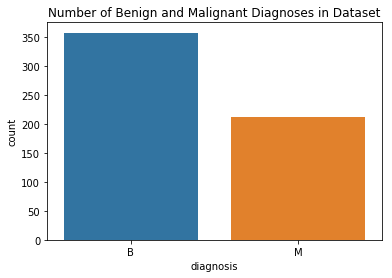

In [13]:
ax = sns.countplot(df['diagnosis'],label="Count") 
ax.set_title('Number of Benign and Malignant Diagnoses in Dataset')

In [14]:
df['diagnosis'].value_counts()
# There are 146 more Benign tumors in the dataset than Malignant ones - leading to class imbalance.  If needed, we can oversample from the Malignant population so that the model can better
#predict the malignant tumors. 

B    357
M    211
Name: diagnosis, dtype: int64

FEATURE DATA EXPLORATION

Take a closer look at the features to see how they relate to the target variable (Diagnosis) and each other. 

In [0]:
#Define X and Y 
y = df.diagnosis                          
list = ['id_number','diagnosis']
x = df.drop(list,axis = 1 ) #x is our set of features 

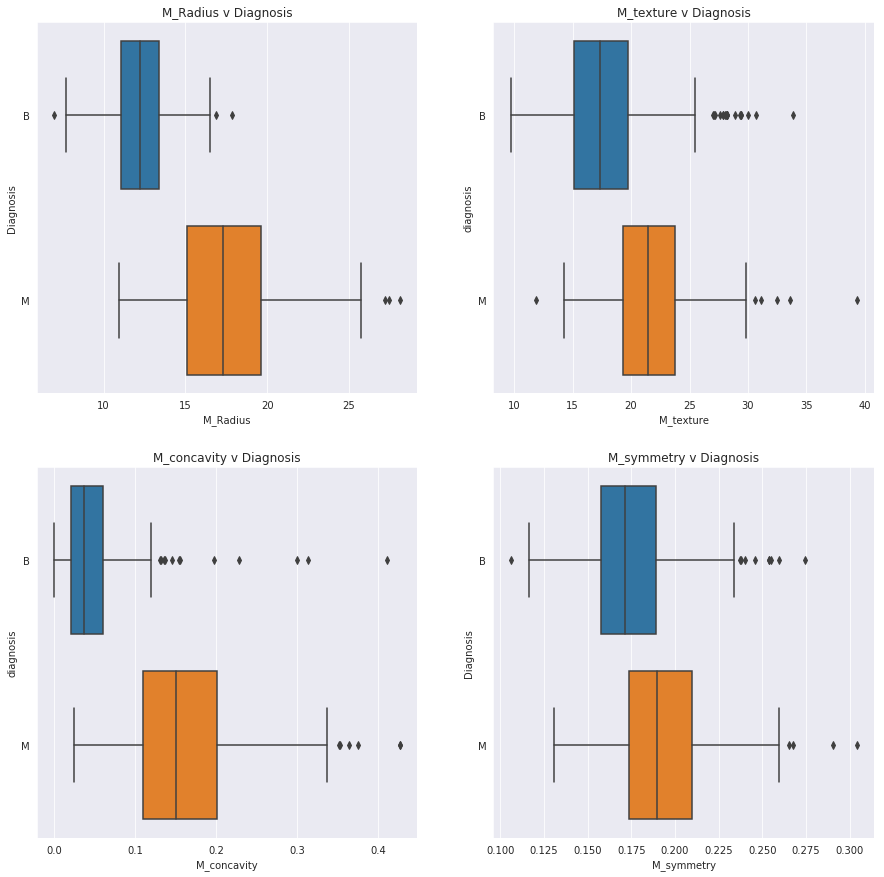

In [16]:
# Suplots of M_features v diagnosis
# I chose to graph these features because I believe the other may be redundant (e.g., radius and area). I will check if they are usinf a corr matrix. 
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'M_radius', y = 'diagnosis', ax = axes[0,0])
axes[0,0].set_xlabel('M_Radius')
axes[0,0].set_ylabel('Diagnosis')
axes[0,0].set_title('M_Radius v Diagnosis')

# Plot [0,1]
sns.boxplot(x = 'M_texture', y = 'diagnosis', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('M_texture')
#axes[0,1].set_ylabel('Diagnosis')
axes[0,1].set_title('M_texture v Diagnosis')

# Plot [1,0]
sns.boxplot(x = 'M_concavity', y = 'diagnosis', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('M_concavity')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('M_concavity v Diagnosis')

# Plot [1,1]
sns.boxplot(x = 'M_symmetry', y = 'diagnosis', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('M_symmetry')
axes[1,1].set_ylabel('Diagnosis')
axes[1,1].set_title('M_symmetry v Diagnosis')

plt.show()


The box plot of these mean features shows thre are a few extreme outliers. 

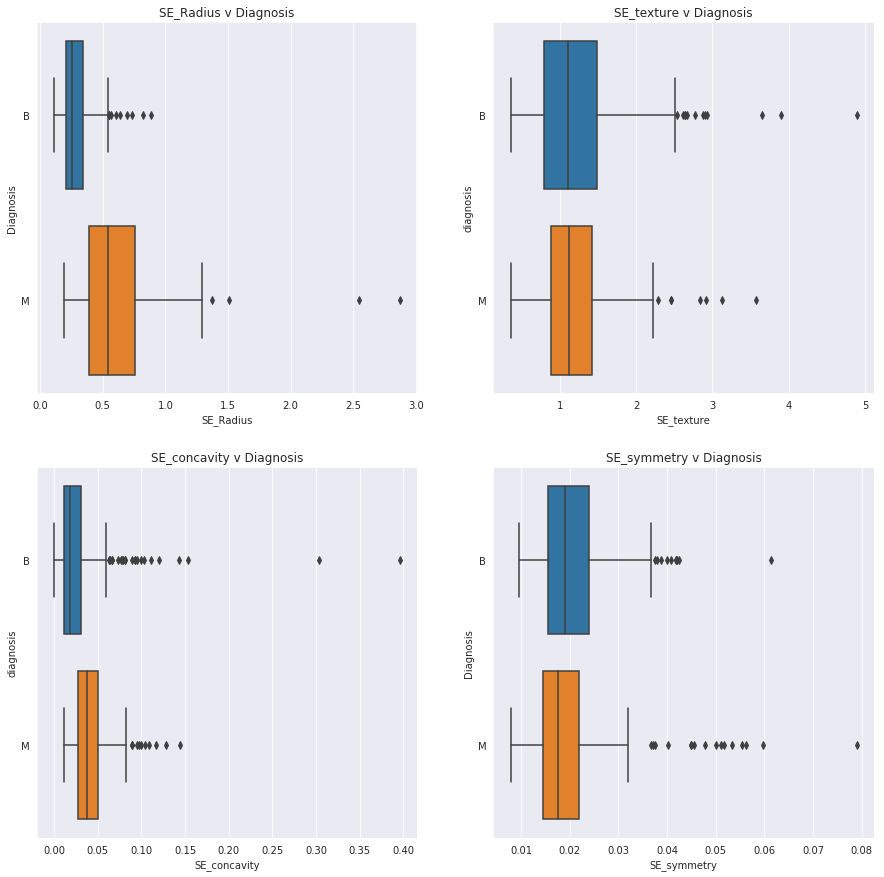

In [17]:
# Suplots of SE_features v diagnosis
# I chose to graph these features because I believe the others (e.g., radius and area) may be redundant with each other. I will check if they are usinf a corr matrix. 
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'SE_radius', y = 'diagnosis', ax = axes[0,0])
axes[0,0].set_xlabel('SE_Radius')
axes[0,0].set_ylabel('Diagnosis')
axes[0,0].set_title('SE_Radius v Diagnosis')

# Plot [0,1]
sns.boxplot(x = 'SE_texture', y = 'diagnosis', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('SE_texture')
#axes[0,1].set_ylabel('Diagnosis')
axes[0,1].set_title('SE_texture v Diagnosis')

# Plot [1,0]
sns.boxplot(x = 'SE_concavity', y = 'diagnosis', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('SE_concavity')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('SE_concavity v Diagnosis')

# Plot [1,1]
sns.boxplot(x = 'SE_symmetry', y = 'diagnosis', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('SE_symmetry')
axes[1,1].set_ylabel('Diagnosis')
axes[1,1].set_title('SE_symmetry v Diagnosis')

plt.show()


The above graphs show that the standard error for benign and malignant are rather similar indicating that is is probably not the best set of feature to use to predict M vs B. 

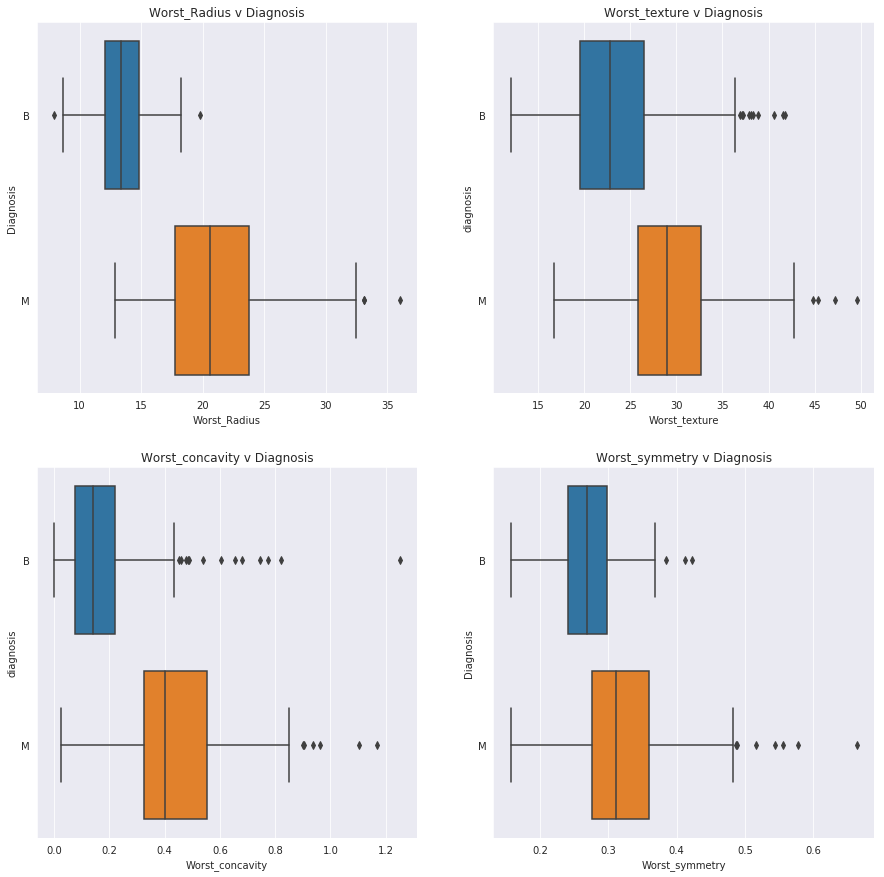

In [18]:
# Suplots of Worst_features v diagnosis
# I chose to graph these features because I believe the others (e.g., radius and area) may be redundant with each other. I will check if they are usinf a corr matrix. 
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'Worst_radius', y = 'diagnosis', ax = axes[0,0])
axes[0,0].set_xlabel('Worst_Radius')
axes[0,0].set_ylabel('Diagnosis')
axes[0,0].set_title('Worst_Radius v Diagnosis')

# Plot [0,1]
sns.boxplot(x = 'Worst_texture', y = 'diagnosis', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('Worst_texture')
#axes[0,1].set_ylabel('Diagnosis')
axes[0,1].set_title('Worst_texture v Diagnosis')

# Plot [1,0]
sns.boxplot(x = 'Worst_concavity', y = 'diagnosis', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Worst_concavity')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Worst_concavity v Diagnosis')

# Plot [1,1]
sns.boxplot(x = 'Worst_symmetry', y = 'diagnosis', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('Worst_symmetry')
axes[1,1].set_ylabel('Diagnosis')
axes[1,1].set_title('Worst_symmetry v Diagnosis')

plt.show()


CORRELATION 

My next step is to see how these variables are correlated with each other. 

Text(0.5, 1.0, 'Variable Correlation without Y')

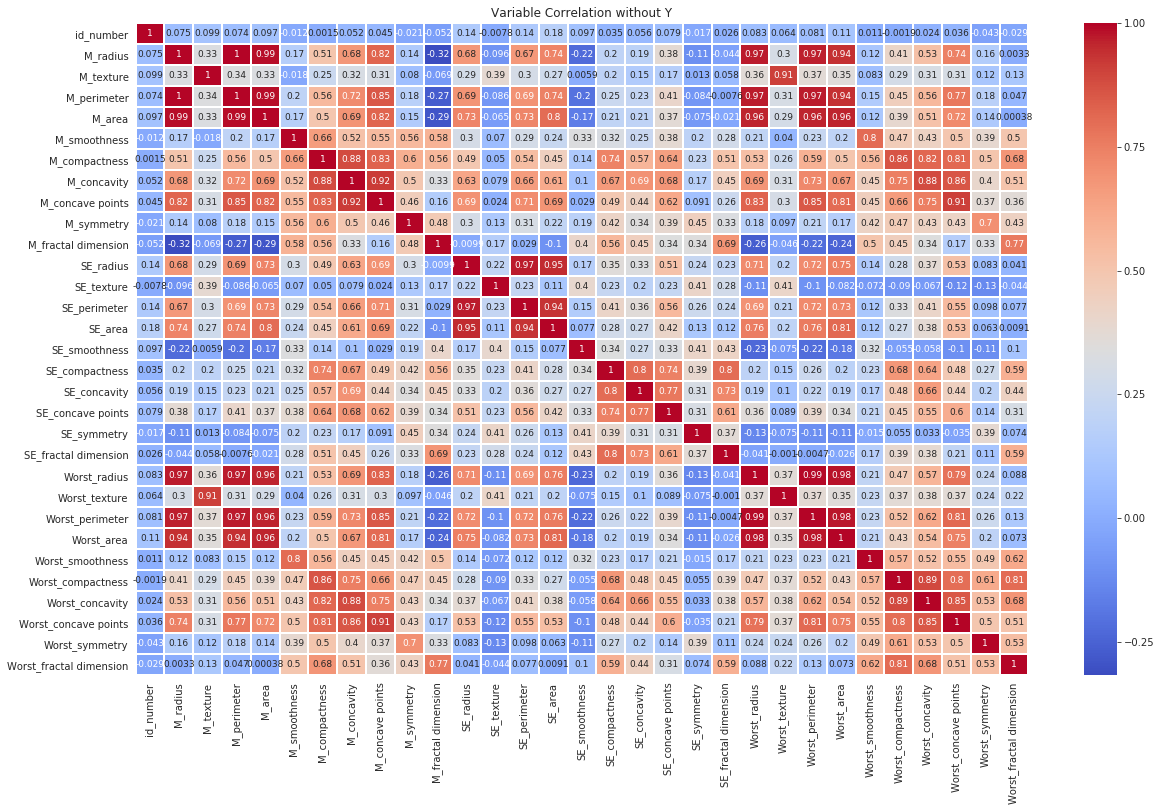

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation without Y')

In [20]:
#Let's convert diagnosis to a binary column so that we can add it to the correlation matrix 
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
print (df['diagnosis'])

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     0
20     0
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
538    0
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    1
562    1
563    1
564    1
565    1
566    1
567    0
Name: diagnosis, Length: 568, dtype: int64


In [0]:
#Print the correltion matrirx again
#plt.figure(figsize=(20,12))
#sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
#plt.title('Variable Correlation with Y')
#Since diagnosis is binary this graph is not heplful. However, I will keep the Y variable binary for now. 

Correlation Observations 

- As expected M_area, M_perimeter, and M_radius  are highly correlated 
- Worst_area, Worst_perimiter, and Worst_radius are also highly correlated with M of the same type
- SE_area, SE_perimeter, and SE_radius are also highly correlated with M and SE of the same type 
- M_compactness, M_concavity and M_concave points are also highly correlated 

Correlation Outputs 

- I will drop the  extremely correlated area, perimeter, and radius variables , as well as, the M-concavity and M_concave point variables. 
-Due to the multicolinarity , as a next step I may want to use PCA

In [0]:
df2  = df.drop(columns =['M_perimeter', 'M_radius', 'M_concavity', 'M_concave points', 'Worst_area', 'Worst_perimeter', 'Worst_radius', 'SE_area', 'SE_perimeter', 'SE_radius'])

In [22]:
#Check to make sure columns dropped appropriately 
df2.head()

,id_number,diagnosis,M_texture,M_area,M_smoothness,M_compactness,M_symmetry,M_fractal dimension,SE_texture,SE_smoothness,SE_compactness,SE_concavity,SE_concave points,SE_symmetry,SE_fractal dimension,Worst_texture,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave points,Worst_symmetry,Worst_fractal dimension
0,842517,1,17.770,1326.000,0.085,0.079,0.181,0.057,0.734,0.005,0.013,0.019,0.013,0.014,0.004,23.410,0.124,0.187,0.242,0.186,0.275,0.089
1,84300903,1,21.250,1203.000,0.110,0.160,0.207,0.060,0.787,0.006,0.040,0.038,0.021,0.022,0.005,25.530,0.144,0.424,0.450,0.243,0.361,0.088
2,84348301,1,20.380,386.100,0.142,0.284,0.260,0.097,1.156,0.009,0.075,0.057,0.019,0.060,0.009,26.500,0.210,0.866,0.687,0.258,0.664,0.173
3,84358402,1,14.340,1297.000,0.100,0.133,0.181,0.059,0.781,0.011,0.025,0.057,0.019,0.018,0.005,16.670,0.137,0.205,0.400,0.163,0.236,0.077
4,843786,1,15.700,477.100,0.128,0.170,0.209,0.076,0.890,0.008,0.033,0.037,0.011,0.022,0.005,23.750,0.179,0.525,0.535,0.174,0.399,0.124


Text(0.5, 1.0, 'Variable Correlation (10 less features)')

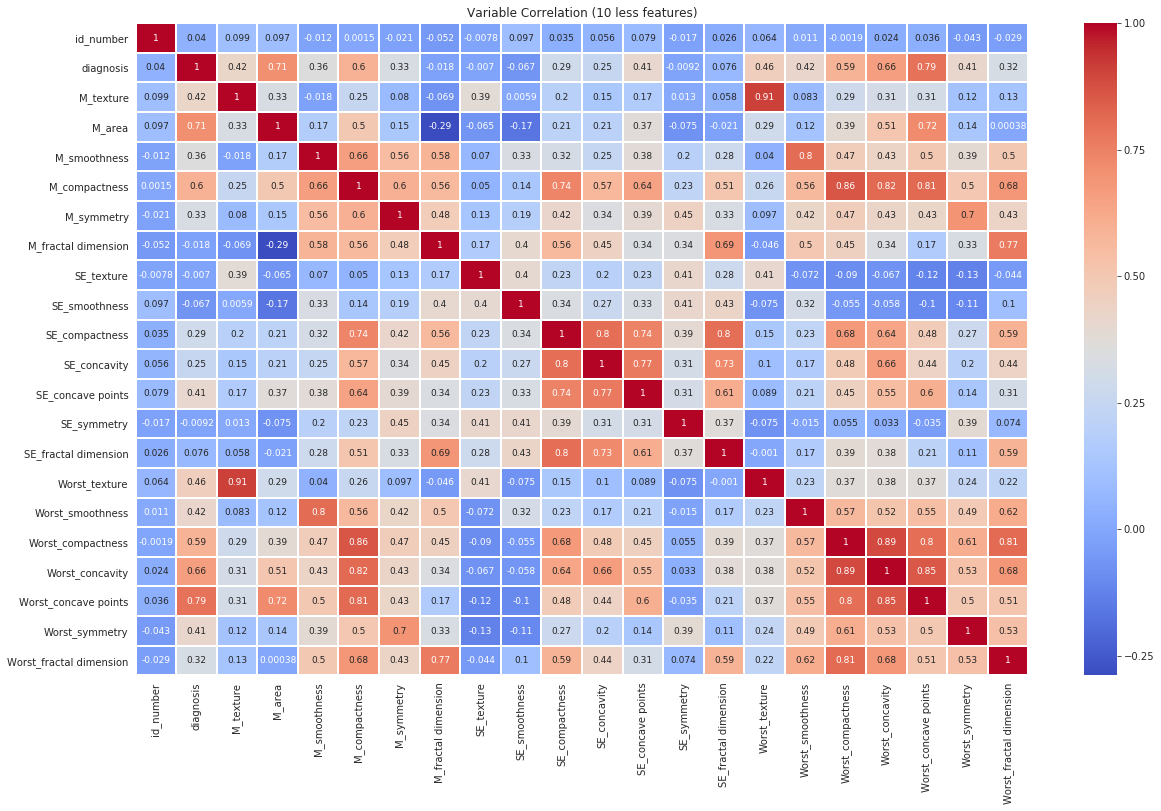

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation (10 less features)')

RUN OUR FIRST MODELS

It is now time to run our first models. As stated above I will try improving the models with PCA if deemed necessary. 

In [0]:
#With a new df2 - Let's redefine X&Y first (Keeping in most of the features this go around)
#Define X and Y 
y2 = df2.diagnosis                          
list = ['id_number','diagnosis']
x2 = df2.drop(list,axis = 1 ) #x is our set of features 

In [0]:
# Train, test, split
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = .30, random_state= 0)

In [36]:
#LINEAR REGRESSION #1 - TRAINING SET  

# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Fit model to training data
regr.fit(x2_train, y2_train) #compare with test and just rerun

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x2, y2)) 


Coefficients: 
 [-5.33282810e-05  3.95996710e-04  1.61690328e+00  2.71510776e-01
 -5.05233246e-02 -1.31290543e+01  1.31736307e-02  1.53584067e+01
 -3.92340539e+00 -3.34111339e+00  4.56457221e+00  1.84328777e+00
  2.60594006e+01  1.01314051e-02  5.12055966e-01 -1.83095152e-01
  6.15840917e-01  2.64839256e+00  6.49544181e-01  2.89660686e+00]

Intercept: 
 -0.5311106166513974

R-squared:
0.7267851336392251


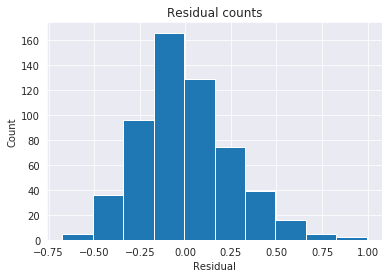

In [37]:
# Extract predicted values.
predicted = regr.predict(x2).ravel()
actual = df2['diagnosis']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# 72.6% of the variation in the data can be accounted for with this model

In [38]:
#Now we can take a closer look at the coefficients to see how well our model worked. 
coef_df = pd.DataFrame(data = regr.coef_, index = x2.columns, columns = ['Coefficients'])
coef_df

,Coefficients
M_texture,-0.000
M_area,0.000
M_smoothness,1.617
M_compactness,0.272
M_symmetry,-0.051
M_fractal dimension,-13.129
SE_texture,0.013
SE_smoothness,15.358
SE_compactness,-3.923
SE_concavity,-3.341


In [39]:
#LINEAR REGRESSION #1 - TEST 

# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Fit model to training data
regr.fit(x2_test, y2_test)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x2, y2)) 


Coefficients: 
 [ 3.23000004e-02  4.58830659e-04  1.97989256e+00 -7.86496292e-01
 -9.50363014e-01 -1.99795368e+01  8.43574745e-02  3.01966058e+01
  5.67082208e+00 -3.98601969e+00  1.88149235e+01 -3.05147658e+00
 -5.14558479e+01 -1.14992417e-02 -2.58792849e+00 -1.85797427e+00
  8.59644496e-01  2.43472897e+00  2.53015519e+00  1.53487438e+01]

Intercept: 
 -0.9565031617506425

R-squared:
0.6864551287423677


In [40]:
#LOGISTIC REGRESSION - TRAIN 
#Because we have a binary outcome variable I would next like to try logistic regression 

# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)

# Fit the model.
fit = lr.fit(x2_train, y2_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(x2)

print('\n Accuracy by Diagnosis')
print(pd.crosstab(pred_y_sklearn, y2))

print('\n Percentage accuracy')
print(lr.score(x2, y2))

Coefficients
[[-2.52347017e-01  1.46565410e-02  6.96980072e+00  8.00469037e+00
   4.11135499e+00 -7.72318725e-02 -1.32346666e+00  1.17245183e+00
  -2.57860397e+00 -3.06612893e+00  1.15616968e+00  7.96030992e-01
  -1.10305376e-01  4.76575269e-01  1.16235022e+01 -3.18581156e-02
   4.62017994e+00  1.75744783e+01  7.98753943e+00  9.66641214e-01]]
[-25.93095737]

 Accuracy by Diagnosis
diagnosis    0    1
row_0              
0          354   14
1            3  197

 Percentage accuracy
0.9700704225352113


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


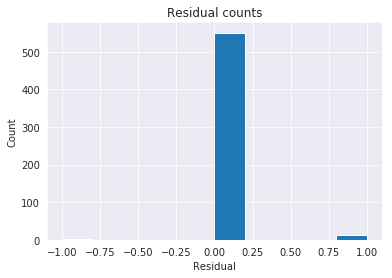

In [41]:
# Extract predicted values.
predicted_log = lr.predict(x2).ravel()
actual_log = df2['diagnosis']
# Calculate the error, also called the residual.
residual_log = actual_log - predicted_log

plt.hist(residual_log)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


In [42]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report  
results = confusion_matrix(actual_log, predicted_log) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :'),accuracy_score(actual_log, predicted_log) 
print ('Report : ')
print (classification_report(actual_log, predicted_log)) 

Confusion Matrix :
[[354   3]
 [ 14 197]]
Accuracy Score :
Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       357
           1       0.98      0.93      0.96       211

    accuracy                           0.97       568
   macro avg       0.97      0.96      0.97       568
weighted avg       0.97      0.97      0.97       568



In [43]:
#LOGISTIC REGRESSION - TEST 
#Because we have a binary outcome variable I would next like to try logistic regression 

# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)

# Fit the model.
fit = lr.fit(x2_test, y2_test)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(x2)

print('\n Accuracy by Diagnosis')
print(pd.crosstab(pred_y_sklearn, y2))

print('\n Percentage accuracy')
print(lr.score(x2, y2))

Coefficients
[[ 8.56267940e-01  2.61728880e-02  2.01423260e+01 -2.03076850e+01
  -1.91684087e+01 -2.10455409e+00  4.26853488e+00  3.57851756e+00
  -1.42767939e+01 -1.31418937e+01  5.07113837e+00 -6.08801221e+00
  -1.92268867e+00 -2.07095295e-01  5.42941683e+01 -2.88106429e+01
   3.28928715e+01  3.23971527e+01  3.39677493e+01 -4.29948643e-01]]
[-51.62294834]

 Accuracy by Diagnosis
diagnosis    0    1
row_0              
0          337   12
1           20  199

 Percentage accuracy
0.9436619718309859


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


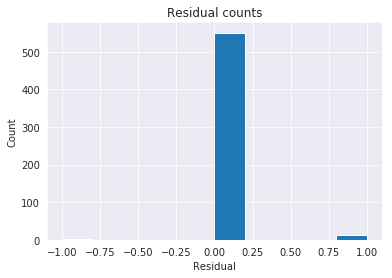

In [52]:
# Extract predicted values.
predicted_log2 = lr.predict(x2).ravel()
actual_log2 = df2['diagnosis']
# Calculate the error, also called the residual.
residual_log2 = actual_log2 - predicted_log2

plt.hist(residual_log)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [46]:
#RANDOM FORREST - TRAIN 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()  #Use gridsearch for hyperparameter

#Train the model using the training sets 
rfc.fit(x2_train,y2_train)
y_pred2=rfc.predict(x2)
#cross_val_score(rfc, x2_train, y2_train, cv=5)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Prediction Accuracy:",metrics.accuracy_score(y2, y_pred2))

Prediction Accuracy: 0.9806338028169014


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
#RANDOM FOREST - TEST 
#Train the model using the test sets 
rfc.fit(x2_test,y2_test)
y_pred3=rfc.predict(x2)
#cross_val_score(rfc, x2_train, y2_train, cv=5)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Prediction Accuracy:",metrics.accuracy_score(y2, y_pred3))

Prediction Accuracy: 0.9524647887323944


In [48]:
#RANDOM FORREST WITH GRADIENT BOOSTING - TRAIN
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(x2_train, y2_train)

predict_train = clf.predict(x2_train)
predict_test = clf.predict(x2_test)

print('\n Percentage accuracy')
print(clf.score(x2, y2))

# Accuracy tables.
table_train = pd.crosstab(y2_train, predict_train, margins=True)
table_test = pd.crosstab(y2_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



 Percentage accuracy
0.9876760563380281
Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.005847953216374269
Percent Type II errors: 0.03508771929824561


In [49]:
#RANDOM FORREST WITH GRADIENT BOOSTING - Test 

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(x2_test, y2_test)


print('\n Percentage accuracy')
print(clf.score(x2, y2))


 Percentage accuracy
0.9647887323943662


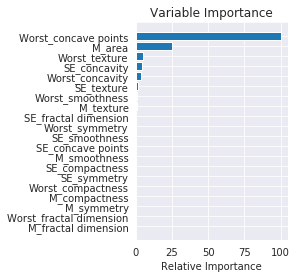

In [78]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
#drop the features from the feature and rerun the models on the remaining features 